In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf 
import pathlib
from sklearn.metrics import confusion_matrix ,accuracy_score

## 1- loading the dataset

In [2]:
data_apth = "../input/water-potability/water_potability.csv"

data = pd.read_csv(data_apth)

## 2- summarizing and cleaning the data 

In [3]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
print("The number of examples: {}".format(len(data)))

The number of examples: 3276


In [5]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None


0    1998
1    1278
Name: Potability, dtype: int64


60.99% of the data is from the Not potable class and 39.01% is from the potable class


<AxesSubplot:ylabel='Frequency'>

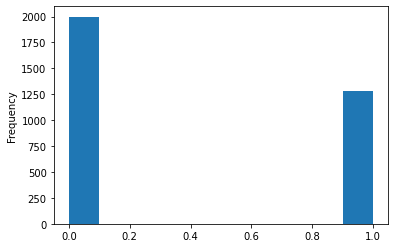

In [7]:
# plotting the output to see if the data is bananced or not.
# I will use accuracy and confusion matrix to evaluat the results 
print(data['Potability'].value_counts())
print("\n")
print("{:.2F}% of the data is from the Not potable class and {:.2F}% is from the potable class".format(1998/len(data) * 100,
                                                                                                       1278/len(data) * 100))
data['Potability'].plot(kind='hist')

In [8]:
data['Potability'] = data['Potability'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ph               2785 non-null   float64 
 1   Hardness         3276 non-null   float64 
 2   Solids           3276 non-null   float64 
 3   Chloramines      3276 non-null   float64 
 4   Sulfate          2495 non-null   float64 
 5   Conductivity     3276 non-null   float64 
 6   Organic_carbon   3276 non-null   float64 
 7   Trihalomethanes  3114 non-null   float64 
 8   Turbidity        3276 non-null   float64 
 9   Potability       3276 non-null   category
dtypes: category(1), float64(9)
memory usage: 233.8 KB


In [9]:
#There are no duplicated rows
data.duplicated().sum()

0

## Hndling missing values

In [10]:
data.fillna(value=data.median(), inplace=True)

In [11]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## 3- Split the dataset 

In [12]:
examples = data.drop('Potability', axis=1)
target = data['Potability']

In [13]:
x_train_full, x_test,  y_train_full, y_test = train_test_split(examples,
                                                               target,
                                                               shuffle=True, test_size=0.2)

x_train, x_val, y_train, y_val = train_test_split(x_train_full,
                                                  y_train_full,
                                                  shuffle=True, test_size=0.2)

print("Training data shape: {}".format(x_train.shape))
print("Validation data shape: {}".format(x_val.shape))
print("Testing data shape: {}".format(x_test.shape))

Training data shape: (2096, 9)
Validation data shape: (524, 9)
Testing data shape: (656, 9)


In [14]:
# # feature selection
# list_drop = ['bla','bla','bla','bla','bla']

# x_train_final = x_train.drop(columns=list_drop)
# x_val_final = x_val.drop(columns=list_drop)
# x_test_final = X_test.drop(columns=list_drop)
# split_dtypes(X_train_final)

In [15]:
# # misal dengan skelarn
# fe = ColumnTransformer([
#     ('cat_ohe', OneHotEncoder(), X_train_cat_list),
#     ('scaling', StandardScaler(), X_train_num_list)
# ])

In [16]:
# X_train_scale_enc = fe.fit_transform(X_train_final)
# X_val_scale_enc = fe.transform(X_val_final)
# X_test_scale_enc = fe.transform(X_test_final)

#nanti data yang di transform ini yg akan di masukan ke input pipeline

## 4-  Input pipeline

In [17]:
AUTOTUNE = tf.data.AUTOTUNE

In [18]:
def preprocessing(data, label):
    
    """function that takes the data and labels, 
    standarize the data and return the standarized
    data and the labels"""
    
    mean = tf.reduce_mean(data, axis=0)
    std = tf.math.reduce_std(data, axis=0)
    
    preprocessed_data = (data - mean) / std
    
    return preprocessed_data, label

In [19]:
def get_batches(x, y, shuffle_buffer_size, batch_size, shuffle=False):
    
    #Building a pipeline from a data that exists in memory
    data_ds = tf.data.Dataset.from_tensor_slices((x, y))
    #mapping the fuction we alredy made to the data
    preprocessed_data = data_ds.map(preprocessing)
    
    
    if shuffle:
        # if we want to shuffle the dataset given a buffer size
        shuffled_data = preprocessed_data.shuffle(shuffle_buffer_size)
        
        # prefetch` lets the dataset fetch batches in the background while the model is training.
        data_batches = shuffled_data.batch(batch_size).cache().prefetch(AUTOTUNE) #berapa banyak batch yg ingin di prefetch
        
    else: 
        
        data_batches = preprocessed_data.batch(batch_size).cache().prefetch(AUTOTUNE)
    
    
    return data_batches 

In [20]:
training_batches = get_batches(x_train, y_train, 1024, 64, shuffle=True)
validation_batches = get_batches(x_val, y_val, 256, 64, shuffle=False)
testing_batches = get_batches(x_test, y_test, 256, 64, shuffle=False)

# training_batches = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(x_train.shape[0]).batch(32)
# validation_batches = tf.data.Dataset.from_tensor_slices((x_test, y_test)).shuffle(x_test.shape[0]).batch(32)

# training_batches = training_batches.cache().prefetch(buffer_size=AUTOTUNE)batches
# validation_batches = validation_batches.cache().prefetch(buffer_size=AUTOTUNE)

## 5- Creating and training a model

In [21]:
# learning rate scheduling
def exponential_decay(lr_0, s):
    def exponential_decay_func(epoch):
        return lr_0 * 0.1 ** (epoch / s)
    return exponential_decay_func

exponential_decay_func = exponential_decay(lr_0=0.01, s=20)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_func)

In [22]:
def leaky_relu(x):
    return tf.maximum(0.01*x, x)

In [23]:
model_input = tf.keras.Input(shape=(9,))

x = tf.keras.layers.Dense(256,
                          kernel_regularizer=tf.keras.regularizers.L2(),
                          kernel_initializer='he_normal')(model_input)

x = tf.keras.layers.Lambda(leaky_relu)(x)

x = tf.keras.layers.BatchNormalization()(x)

x = tf.keras.layers.Dense(128,
                          kernel_regularizer=tf.keras.regularizers.L2(),
                          kernel_initializer='he_normal')(x)

x = tf.keras.layers.Lambda(leaky_relu)(x)

x = tf.keras.layers.BatchNormalization()(x)

model_output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(inputs=model_input, outputs=model_output)

In [24]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.RMSprop(),
             metrics=['acc'])

model.fit(training_batches, 
         epochs=500, 
         validation_data=validation_batches,
         callbacks=[lr_scheduler])

Epoch 1/500
33/33 [==============================] - 2s 26ms/step - loss: 5.2395 - acc: 0.5631 - val_loss: 1.8521 - val_acc: 0.5859
Epoch 2/500
33/33 [==============================] - 0s 5ms/step - loss: 1.5860 - acc: 0.5686 - val_loss: 0.9526 - val_acc: 0.5859
Epoch 3/500
33/33 [==============================] - 0s 4ms/step - loss: 0.8928 - acc: 0.5778 - val_loss: 0.7309 - val_acc: 0.5859
Epoch 4/500
33/33 [==============================] - 0s 5ms/step - loss: 0.7312 - acc: 0.5902 - val_loss: 0.6955 - val_acc: 0.5859
Epoch 5/500
33/33 [==============================] - 0s 5ms/step - loss: 0.6985 - acc: 0.5893 - val_loss: 0.6904 - val_acc: 0.5859
Epoch 6/500
33/33 [==============================] - 0s 4ms/step - loss: 0.6877 - acc: 0.6035 - val_loss: 0.6891 - val_acc: 0.5859
Epoch 7/500
33/33 [==============================] - 0s 5ms/step - loss: 0.6857 - acc: 0.6001 - val_loss: 0.6849 - val_acc: 0.5859
Epoch 8/500
33/33 [==============================] - 0s 5ms/step - loss: 0.6802 - 

In [25]:
model.evaluate(testing_batches)

11/11 [==============================] - 0s 5ms/step - loss: 0.6568 - acc: 0.6540


[0.6567526459693909, 0.6539633870124817]

## Binning Data and without input pipeline

In [26]:
def from_continuous_to_category(datafrmae, num_bins):
    
    features = list(datafrmae.columns)
    features_list = []
    
    for num, column in enumerate(features):
        feature = datafrmae[column]
        
        bins = np.linspace(feature.min(), feature.max(), num_bins)
        which_bin = np.digitize(feature, bins=bins)
        
        encoder = OneHotEncoder(sparse=False)
        encoder.fit(which_bin.reshape(-1, 1))
        x_binned = encoder.transform(which_bin.reshape(-1, 1))
        
        df = pd.DataFrame(x_binned)
        features_list.append(df)
        
    return pd.concat(features_list, axis=1)

In [27]:
x_train_binned = from_continuous_to_category(x_train, 5)
x_val_binned = from_continuous_to_category(x_val, 5)
x_test_binned = from_continuous_to_category(x_test, 5)

In [28]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(256, activation='relu', input_shape=(x_train_binned.shape[1],),
                               kernel_regularizer=tf.keras.regularizers.L2()))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(128, activation='relu',
                               kernel_regularizer=tf.keras.regularizers.L2()))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=['acc'])


model.fit(x_train_binned,  y_train,
         epochs=10, 
         validation_data=(x_val_binned, y_val))

Epoch 1/10
66/66 [==============================] - 1s 7ms/step - loss: 2.9853 - acc: 0.5272 - val_loss: 2.3750 - val_acc: 0.5859
Epoch 2/10
66/66 [==============================] - 0s 3ms/step - loss: 2.1625 - acc: 0.6277 - val_loss: 2.0276 - val_acc: 0.5859
Epoch 3/10
66/66 [==============================] - 0s 3ms/step - loss: 1.7614 - acc: 0.6538 - val_loss: 1.7625 - val_acc: 0.5859
Epoch 4/10
66/66 [==============================] - 0s 3ms/step - loss: 1.4976 - acc: 0.6853 - val_loss: 1.5671 - val_acc: 0.5859
Epoch 5/10
66/66 [==============================] - 0s 3ms/step - loss: 1.3012 - acc: 0.6912 - val_loss: 1.4104 - val_acc: 0.5878
Epoch 6/10
66/66 [==============================] - 0s 3ms/step - loss: 1.1617 - acc: 0.7002 - val_loss: 1.2686 - val_acc: 0.6126
Epoch 7/10
66/66 [==============================] - 0s 3ms/step - loss: 1.0499 - acc: 0.7076 - val_loss: 1.1568 - val_acc: 0.6202
Epoch 8/10
66/66 [==============================] - 0s 3ms/step - loss: 1.0018 - acc: 0.69

In [29]:
model.evaluate(x_test_binned, y_test)

21/21 [==============================] - 0s 1ms/step - loss: 1.0352 - acc: 0.5991


[1.035194754600525, 0.5990853905677795]

## sklearn scalling, PolynomialFeatures

In [30]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

In [31]:
pipe = Pipeline([('poly', PolynomialFeatures()),
               ('scaling', StandardScaler())])

pipe.fit(x_train)

x_train_ready = pipe.transform(x_train)
x_val_ready = pipe.transform(x_val)
x_test_ready = pipe.transform(x_test)

In [32]:
class stop_training(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('val_acc')>0.69):
            print("\nReached 69% accuracy so canceling training!")
            self.model.stop_training = True

my_callbacks = stop_training()


early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                  patience=5,
                                                  restore_best_weights=True)

In [33]:
model = tf.keras.models.Sequential()

        
model.add(tf.keras.layers.Dense(512, activation='relu',
                               kernel_regularizer=tf.keras.regularizers.L2()))
model.add(tf.keras.layers.BatchNormalization())
          
model.add(tf.keras.layers.Dense(256, activation='relu',
                               kernel_regularizer=tf.keras.regularizers.L2()))
model.add(tf.keras.layers.BatchNormalization())
          
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [34]:
model.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=['acc'])

In [35]:
model.fit(x_train_ready,  y_train,
         epochs=5, 
         validation_data=(x_val_ready, y_val),
         callbacks=[early_stopping, my_callbacks])

Epoch 1/5
66/66 [==============================] - 2s 8ms/step - loss: 4.8663 - acc: 0.5554 - val_loss: 3.3893 - val_acc: 0.6126
Epoch 2/5
66/66 [==============================] - 0s 5ms/step - loss: 3.0910 - acc: 0.6561 - val_loss: 2.4037 - val_acc: 0.6183
Epoch 3/5
66/66 [==============================] - 0s 5ms/step - loss: 2.1903 - acc: 0.6608 - val_loss: 1.7629 - val_acc: 0.6107
Epoch 4/5
66/66 [==============================] - 0s 5ms/step - loss: 1.5894 - acc: 0.6680 - val_loss: 1.3806 - val_acc: 0.6355
Epoch 5/5
66/66 [==============================] - 0s 5ms/step - loss: 1.2748 - acc: 0.6620 - val_loss: 1.1500 - val_acc: 0.6260


In [36]:
model.evaluate(x_test_ready, y_test)

21/21 [==============================] - 0s 2ms/step - loss: 1.1020 - acc: 0.6753


[1.101958155632019, 0.6753048896789551]

# Reference:
- https://www.kaggle.com/naseralqaydeh/tensorflow-input-pipeline-tf-data